## Plot Spark and Kafka startup times

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('rp-streaming_startup.csv', skipinitialspace=True)

In [40]:
data = data.sort_values(by='nodes')
data.head()

,Spark download,Spark startup,kafka download,kafka startup,nodes,system
0,8.098390,18.277243,3.108133,0.070536,2,stampede
1,9.125283,19.306798,2.492341,0.070543,2,stampede
19,9.506149,5.999059,1.820754,0.061563,2,comet
26,14.092996,6.476282,1.545431,0.075235,2,wrangler
6,10.876481,19.074302,2.615791,0.070538,2,stampede


### Plot on Stampede 

In [2]:
stampede_data = data[(data.system== 'stampede')]
stampede_data_mean = stampede_data.groupby(['nodes']).mean()
#data.groupby(['nodes']).std()
stampede_data_mean
#stampede_data.groupby(['nodes']).std()

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,9.366718,18.886114,2.738755,0.070539
4,10.192801,18.269891,2.620175,0.113262
8,10.248365,18.735165,2.561799,0.214861
16,12.692423,19.857494,2.608371,0.402541


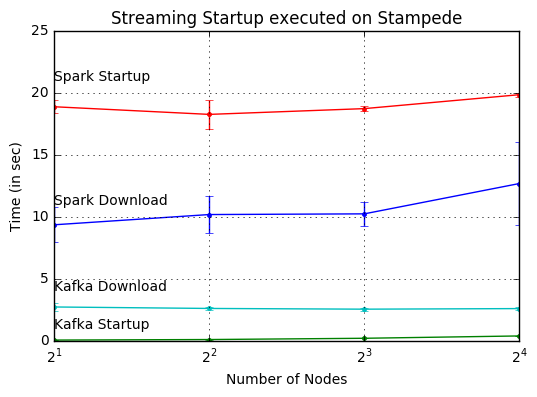

In [30]:
ax = stampede_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Stampede', 
                      legend=None,
                      #xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= stampede_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),
            )
ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),
            )
ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 21),
            )
ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),
            )
ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')

### Plot on Comet 

In [21]:
comet_data = data[(data.system== 'comet')]
comet_data_mean = comet_data.groupby(['nodes']).mean()
#data.groupby(['nodes']).std()
comet_data_mean
comet_data.groupby(['nodes']).std()

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,3.448167,0.007126,0.024307,0.004074
4,0.837816,0.019428,0.365395,0.004863
8,2.845063,0.295520,0.084856,0.005583
16,7.718341,0.275699,0.193742,0.016769


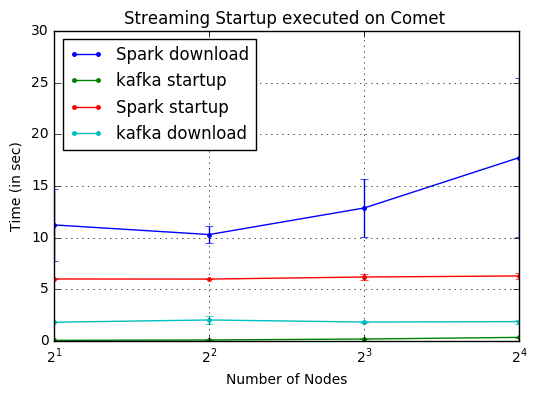

In [23]:
ax = comet_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Comet ', 
                      #legend=None,
                      #xlim=(0,16),
                      xticks = [2,4,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= comet_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)
#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 17),)

#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)
ax.grid()
plt.show()

### Plot on Wrangler

In [25]:
wrangler_data = data[(data.system== 'wrangler')]
wrangler_data_mean = wrangler_data.groupby(['nodes']).mean()
wrangler_data_mean
#wrangler_data.groupby(['nodes']).std()
#wrangler_data

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,10.096653,6.473950,1.930973,0.078095
4,6.700355,11.986043,1.767754,0.088012
8,5.766068,11.939267,1.639437,0.129926


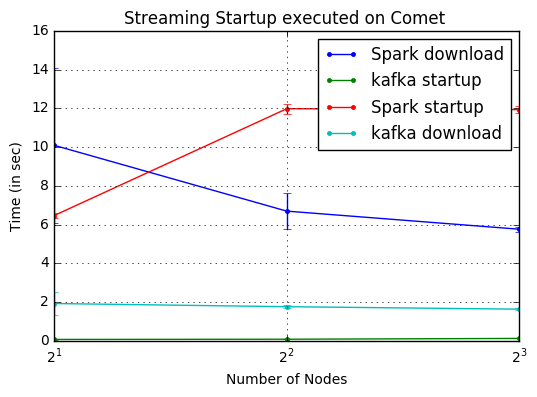

In [26]:
ax = wrangler_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Comet ', 
                      #legend=None,
                      #xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= wrangler_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)
#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 17),)

#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)
ax.grid()
plt.show()